In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
##zipcodes = gpd.read_file('../data/zipcodes.geojson')
#print(zipcodes.crs)
##zipcodes.head( )

better_health = gpd.read_file('../data/Better_Health_Data_2024_release_20241202.geojson')
##print(better_health)
better_health.head(2)

,measure,low_confidence_limit,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,locationid,year,high_confidence_limit,...,data_value_footnote,data_value_type,data_value_footnote_symbol,locationname,category,datavaluetypeid,measureid,datasource,totalpopulation,geometry
0,Diagnosed diabetes among adults,11.8,%,12.0,Diabetes,United States,260836730,59,2022,12.2,...,None,Crude prevalence,None,None,Health Outcomes,CrdPrv,DIABETES,BRFSS,333287557,None
1,Hearing disability among adults,8.5,%,9.6,Hearing Disability,Alabama,19675,01005,2022,10.7,...,None,Crude prevalence,None,Barbour,Disability,CrdPrv,HEARING,BRFSS,24706,POINT (-85.39281 31.86982)


In [3]:
better_health.tail(2)

,measure,low_confidence_limit,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,locationid,year,high_confidence_limit,...,data_value_footnote,data_value_type,data_value_footnote_symbol,locationname,category,datavaluetypeid,measureid,datasource,totalpopulation,geometry
240884,Self-care disability among adults,2.9,%,3.2,Self-care Disability,Wisconsin,107333,55073,2022,3.5,...,None,Crude prevalence,None,Marathon,Disability,CrdPrv,SELFCARE,BRFSS,137958,POINT (-89.75886 44.89830)
240885,Binge drinking among adults,13.5,%,16.4,Binge Drinking,Wyoming,29818,56013,2022,19.5,...,None,Crude prevalence,None,Fremont,Health Risk Behaviors,CrdPrv,BINGE,BRFSS,39472,POINT (-108.63045 43.04064)


In [4]:
better_health.columns

Index(['measure', 'low_confidence_limit', 'data_value_unit', 'data_value',
       'short_question_text', 'statedesc', 'totalpop18plus', 'locationid',
       'year', 'high_confidence_limit', 'categoryid', 'stateabbr',
       'data_value_footnote', 'data_value_type', 'data_value_footnote_symbol',
       'locationname', 'category', 'datavaluetypeid', 'measureid',
       'datasource', 'totalpopulation', 'geometry'],
      dtype='object')

In [5]:
better_health_df1=better_health.drop(columns =['data_value_unit', 'data_value_footnote', 'data_value_footnote_symbol', 'datavaluetypeid', 'measureid', 'datasource'])
better_health_df1          


,measure,low_confidence_limit,data_value,short_question_text,statedesc,totalpop18plus,locationid,year,high_confidence_limit,categoryid,stateabbr,data_value_type,locationname,category,totalpopulation,geometry
0,Diagnosed diabetes among adults,11.8,12.0,Diabetes,United States,260836730,59,2022,12.2,HLTHOUT,US,Crude prevalence,None,Health Outcomes,333287557,None
1,Hearing disability among adults,8.5,9.6,Hearing Disability,Alabama,19675,01005,2022,10.7,DISABLT,AL,Crude prevalence,Barbour,Disability,24706,POINT (-85.39281 31.86982)
2,Stroke among adults,3.4,3.7,Stroke,Alabama,91336,01015,2022,4.0,HLTHOUT,AL,Age-adjusted prevalence,Calhoun,Health Outcomes,115788,POINT (-85.82577 33.77149)
3,Stroke among adults,5.1,5.6,Stroke,Alabama,27025,01017,2022,6.0,HLTHOUT,AL,Crude prevalence,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,Stroke among adults,4.9,5.3,Stroke,Alabama,11235,01027,2022,5.7,HLTHOUT,AL,Crude prevalence,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240881,High blood pressure among adults,29.9,34.3,High Blood Pressure,Wisconsin,36755,55095,2021,38.8,HLTHOUT,WI,Crude prevalence,Polk,Health Outcomes,45709,POINT (-92.44128 45.46151)
240882,Depression among adults,20.9,24.5,Depression,Wisconsin,23116,55121,2022,28.2,HLTHOUT,WI,Age-adjusted prevalence,Trempealeau,Health Outcomes,30899,POINT (-91.35842 44.30395)
240883,Visited dentist or dental clinic in the past y...,60.1,64.3,Dental Visit,Wisconsin,25807,55029,2022,67.8,PREVENT,WI,Age-adjusted prevalence,Door,Prevention,30526,POINT (-87.31142 44.95001)
240884,Self-care disability among adults,2.9,3.2,Self-care Disability,Wisconsin,107333,55073,2022,3.5,DISABLT,WI,Crude prevalence,Marathon,Disability,137958,POINT (-89.75886 44.89830)


In [6]:
better_health_df1['short_question_text']=better_health_df1['short_question_text'].astype(str)
better_health_df1

,measure,low_confidence_limit,data_value,short_question_text,statedesc,totalpop18plus,locationid,year,high_confidence_limit,categoryid,stateabbr,data_value_type,locationname,category,totalpopulation,geometry
0,Diagnosed diabetes among adults,11.8,12.0,Diabetes,United States,260836730,59,2022,12.2,HLTHOUT,US,Crude prevalence,None,Health Outcomes,333287557,None
1,Hearing disability among adults,8.5,9.6,Hearing Disability,Alabama,19675,01005,2022,10.7,DISABLT,AL,Crude prevalence,Barbour,Disability,24706,POINT (-85.39281 31.86982)
2,Stroke among adults,3.4,3.7,Stroke,Alabama,91336,01015,2022,4.0,HLTHOUT,AL,Age-adjusted prevalence,Calhoun,Health Outcomes,115788,POINT (-85.82577 33.77149)
3,Stroke among adults,5.1,5.6,Stroke,Alabama,27025,01017,2022,6.0,HLTHOUT,AL,Crude prevalence,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,Stroke among adults,4.9,5.3,Stroke,Alabama,11235,01027,2022,5.7,HLTHOUT,AL,Crude prevalence,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240881,High blood pressure among adults,29.9,34.3,High Blood Pressure,Wisconsin,36755,55095,2021,38.8,HLTHOUT,WI,Crude prevalence,Polk,Health Outcomes,45709,POINT (-92.44128 45.46151)
240882,Depression among adults,20.9,24.5,Depression,Wisconsin,23116,55121,2022,28.2,HLTHOUT,WI,Age-adjusted prevalence,Trempealeau,Health Outcomes,30899,POINT (-91.35842 44.30395)
240883,Visited dentist or dental clinic in the past y...,60.1,64.3,Dental Visit,Wisconsin,25807,55029,2022,67.8,PREVENT,WI,Age-adjusted prevalence,Door,Prevention,30526,POINT (-87.31142 44.95001)
240884,Self-care disability among adults,2.9,3.2,Self-care Disability,Wisconsin,107333,55073,2022,3.5,DISABLT,WI,Crude prevalence,Marathon,Disability,137958,POINT (-89.75886 44.89830)


In [7]:
type(better_health_df1)

geopandas.geodataframe.GeoDataFrame

In [8]:
better_health_df1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 240886 entries, 0 to 240885
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   measure                240886 non-null  object  
 1   low_confidence_limit   240886 non-null  object  
 2   data_value             240886 non-null  object  
 3   short_question_text    240886 non-null  object  
 4   statedesc              240886 non-null  object  
 5   totalpop18plus         240886 non-null  object  
 6   locationid             240886 non-null  object  
 7   year                   240886 non-null  object  
 8   high_confidence_limit  240886 non-null  object  
 9   categoryid             240886 non-null  object  
 10  stateabbr              240886 non-null  object  
 11  data_value_type        240886 non-null  object  
 12  locationname           240806 non-null  object  
 13  category               240886 non-null  object  
 14  totalpopulat

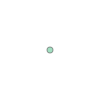

In [9]:
better_health_df1.loc[1,'geometry']

In [10]:
print(better_health_df1.loc[1, 'geometry'])

POINT (-85.3928136383141 31.8698172860413)


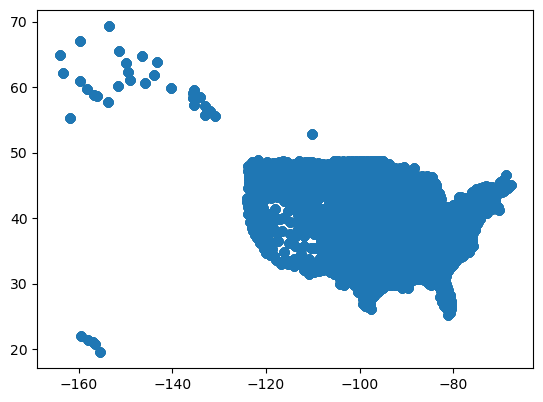

In [11]:
better_health_df1.plot();

In [12]:
##candy_df=pd.read_csv('../data/candy.csv')
nhe_df = pd.read_csv('../data/Table_1_NHE.csv')
nhe_df

,"Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,Item,1960,1970,1980,1990,2000,2001,2002,2003,2004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Amount in Billions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
nhe_df.columns

Index(['Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'U

In [14]:
type(nhe_df)

pandas.core.frame.DataFrame

In [15]:
nhe_df.reset_index

<bound method DataFrame.reset_index of    Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022  \
0                                                Item                                                                                                            
1                                                 NaN                                                                                                            
2                       National Health Expenditures                                                                                                             
3                     Health Consumption Expenditures                                                                                                            
4                                Personal Health Care                                                                                                  

In [16]:
nhe_df.columns

Index(['Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'U

In [17]:
   
nhe_df1 = nhe_df.drop(columns=['Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
                              'Unnamed: 36','Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42','Unnamed: 43',
                              'Unnamed: 44','Unnamed: 45', 'Unnamed: 46','Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
                              'Unnamed: 52','Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59',
                              'Unnamed: 60'])

nhe_df1
    

,"Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,Item,1960,1970,1980,1990,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,NaN,Amount in Billions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7",...,"$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8",...,"2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4",...,"2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:

nhe_df1=nhe_df1.rename(columns ={'Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022': 'NHE',
       'Unnamed: 1': '1960', 'Unnamed: 2': '1970', 'Unnamed: 3': '1980','Unnamed: 4': '1990', 'Unnamed: 5':'2000',
       'Unnamed: 6':'2001', 'Unnamed: 7':'2002', 'Unnamed: 8':'2003', 'Unnamed: 9':'2004', 'Unnamed: 10':'2005',
       'Unnamed: 11':'2006', 'Unnamed: 12':'2007', 'Unnamed: 13':'2008', 'Unnamed: 14':'2009',
       'Unnamed: 15':'2010', 'Unnamed: 16':'2011', 'Unnamed: 17': '2012', 'Unnamed: 18':'2013',
       'Unnamed: 19':'2014', 'Unnamed: 20':'2015', 'Unnamed: 21':'2016', 'Unnamed: 22':'2017',
       'Unnamed: 23':'2018', 'Unnamed: 24':'2019', 'Unnamed: 25':'2020', 'Unnamed: 26':'2021',
       'Unnamed: 27':'2022'})
nhe_df1


,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Item,1960,1970,1980,1990,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,NaN,Amount in Billions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7",...,"$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8",...,"2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4",...,"2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
nhe_df1 = nhe_df1.dropna()
nhe_df1

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Item,1960,1970,1980,1990,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7",...,"$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8",...,"2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4",...,"2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,...,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,...,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4
7,Investment,2.6,7.7,20.6,48.6,85.7,90.0,101.5,108.6,116.9,...,163.1,159.6,163.1,166.2,180.6,189.6,194.0,194.2,207.5,217.8
9,U.S. Population1,186,210,230,254,282,285,287,290,292,...,316,318,320,323,325,327,328,329,330,331
11,Gross Domestic Product2,$542.4,"$1,073.3","$2,857.3","$5,963.1","$10,251.0","$10,581.9","$10,929.1","$11,456.5","$12,217.2",...,"$16,880.7","$17,608.1","$18,295.0","$18,804.9","$19,612.1","$20,656.5","$21,521.4","$21,323.0","$23,594.0","$25,744.1"
22,National Health Expenditures,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,...,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%


In [20]:
#df = df.drop([0, 2])
#df.drop(1, inplace=True)
#df.dropna()
#df.drop(1)  # for 1 row

In [21]:
nhe_df1=nhe_df1.drop(0)
nhe_df1

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7",...,"$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8",...,"2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4",...,"2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,...,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,...,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4
7,Investment,2.6,7.7,20.6,48.6,85.7,90.0,101.5,108.6,116.9,...,163.1,159.6,163.1,166.2,180.6,189.6,194.0,194.2,207.5,217.8
9,U.S. Population1,186,210,230,254,282,285,287,290,292,...,316,318,320,323,325,327,328,329,330,331
11,Gross Domestic Product2,$542.4,"$1,073.3","$2,857.3","$5,963.1","$10,251.0","$10,581.9","$10,929.1","$11,456.5","$12,217.2",...,"$16,880.7","$17,608.1","$18,295.0","$18,804.9","$19,612.1","$20,656.5","$21,521.4","$21,323.0","$23,594.0","$25,744.1"
22,National Health Expenditures,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,...,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%
23,Health Consumption Expenditures,90.5,89.5,91.9,93.2,93.7,93.9,93.8,93.9,93.8,...,94.3,94.7,94.8,95.0,94.8,94.7,94.8,95.3,95.2,95.1


In [22]:
nhe_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2 to 36
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NHE     21 non-null     object
 1   1960    21 non-null     object
 2   1970    21 non-null     object
 3   1980    21 non-null     object
 4   1990    21 non-null     object
 5   2000    21 non-null     object
 6   2001    21 non-null     object
 7   2002    21 non-null     object
 8   2003    21 non-null     object
 9   2004    21 non-null     object
 10  2005    21 non-null     object
 11  2006    21 non-null     object
 12  2007    21 non-null     object
 13  2008    21 non-null     object
 14  2009    21 non-null     object
 15  2010    21 non-null     object
 16  2011    21 non-null     object
 17  2012    21 non-null     object
 18  2013    21 non-null     object
 19  2014    21 non-null     object
 20  2015    21 non-null     object
 21  2016    21 non-null     object
 22  2017    21 non-null     object
 2

In [23]:
##candy_df['Name']=candy_df['Name'].astype(str)
##candy_df.head()
nhe_df1 = nhe_df1.astype(str)
nhe_df1


,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7",...,"$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8",...,"2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4",...,"2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,...,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,...,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4
7,Investment,2.6,7.7,20.6,48.6,85.7,90.0,101.5,108.6,116.9,...,163.1,159.6,163.1,166.2,180.6,189.6,194.0,194.2,207.5,217.8
9,U.S. Population1,186,210,230,254,282,285,287,290,292,...,316,318,320,323,325,327,328,329,330,331
11,Gross Domestic Product2,$542.4,"$1,073.3","$2,857.3","$5,963.1","$10,251.0","$10,581.9","$10,929.1","$11,456.5","$12,217.2",...,"$16,880.7","$17,608.1","$18,295.0","$18,804.9","$19,612.1","$20,656.5","$21,521.4","$21,323.0","$23,594.0","$25,744.1"
22,National Health Expenditures,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,...,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%
23,Health Consumption Expenditures,90.5,89.5,91.9,93.2,93.7,93.9,93.8,93.9,93.8,...,94.3,94.7,94.8,95.0,94.8,94.7,94.8,95.3,95.2,95.1


In [24]:
nhe_df1.shape

(21, 28)

In [25]:
type(nhe_df1)

pandas.core.frame.DataFrame

In [26]:
nhe_df1

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7",...,"$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8",...,"2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4",...,"2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,...,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,...,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4
7,Investment,2.6,7.7,20.6,48.6,85.7,90.0,101.5,108.6,116.9,...,163.1,159.6,163.1,166.2,180.6,189.6,194.0,194.2,207.5,217.8
9,U.S. Population1,186,210,230,254,282,285,287,290,292,...,316,318,320,323,325,327,328,329,330,331
11,Gross Domestic Product2,$542.4,"$1,073.3","$2,857.3","$5,963.1","$10,251.0","$10,581.9","$10,929.1","$11,456.5","$12,217.2",...,"$16,880.7","$17,608.1","$18,295.0","$18,804.9","$19,612.1","$20,656.5","$21,521.4","$21,323.0","$23,594.0","$25,744.1"
22,National Health Expenditures,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,...,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%
23,Health Consumption Expenditures,90.5,89.5,91.9,93.2,93.7,93.9,93.8,93.9,93.8,...,94.3,94.7,94.8,95.0,94.8,94.7,94.8,95.3,95.2,95.1


In [27]:
##pd.set_option('display.max.columns',30)
#df
pd.set_option('display.max.columns', 28)
pd.set_option('display.max.rows', 22)


In [28]:
nhe_df1

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6","$2,165.1","$2,305.5","$2,402.4","$2,492.7","$2,589.6","$2,676.5","$2,783.3","$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0","2,032.1","2,159.3","2,246.1","2,345.5","2,437.5","2,517.8","2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8","1,806.5","1,921.5","2,007.2","2,105.5","2,180.5","2,253.9","2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,164.8,171.9,167.4,165.9,181.4,189.5,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,57.3,60.9,66.0,71.6,74.2,75.7,74.4,77.2,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4
7,Investment,2.6,7.7,20.6,48.6,85.7,90.0,101.5,108.6,116.9,125.5,133.0,146.2,156.3,147.2,152.1,158.7,163.2,163.1,159.6,163.1,166.2,180.6,189.6,194.0,194.2,207.5,217.8
9,U.S. Population1,186,210,230,254,282,285,287,290,292,295,298,301,304,306,309,311,314,316,318,320,323,325,327,328,329,330,331
11,Gross Domestic Product2,$542.4,"$1,073.3","$2,857.3","$5,963.1","$10,251.0","$10,581.9","$10,929.1","$11,456.5","$12,217.2","$13,039.2","$13,815.6","$14,474.2","$14,769.9","$14,478.1","$15,049.0","$15,599.7","$16,254.0","$16,880.7","$17,608.1","$18,295.0","$18,804.9","$19,612.1","$20,656.5","$21,521.4","$21,323.0","$23,594.0","$25,744.1"
22,National Health Expenditures,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%
23,Health Consumption Expenditures,90.5,89.5,91.9,93.2,93.7,93.9,93.8,93.9,93.8,93.8,93.9,93.7,93.5,94.1,94.1,94.1,94.1,94.3,94.7,94.8,95.0,94.8,94.7,94.8,95.3,95.2,95.1


In [29]:
##df.reset_index(drop=True, inplace=True)

nhe_df1 = nhe_df1.reset_index(drop=True)
nhe_df1

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6","$2,165.1","$2,305.5","$2,402.4","$2,492.7","$2,589.6","$2,676.5","$2,783.3","$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
1,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0","2,032.1","2,159.3","2,246.1","2,345.5","2,437.5","2,517.8","2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
2,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8","1,806.5","1,921.5","2,007.2","2,105.5","2,180.5","2,253.9","2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
3,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,164.8,171.9,167.4,165.9,181.4,189.5,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
4,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,57.3,60.9,66.0,71.6,74.2,75.7,74.4,77.2,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4
5,Investment,2.6,7.7,20.6,48.6,85.7,90.0,101.5,108.6,116.9,125.5,133.0,146.2,156.3,147.2,152.1,158.7,163.2,163.1,159.6,163.1,166.2,180.6,189.6,194.0,194.2,207.5,217.8
6,U.S. Population1,186,210,230,254,282,285,287,290,292,295,298,301,304,306,309,311,314,316,318,320,323,325,327,328,329,330,331
7,Gross Domestic Product2,$542.4,"$1,073.3","$2,857.3","$5,963.1","$10,251.0","$10,581.9","$10,929.1","$11,456.5","$12,217.2","$13,039.2","$13,815.6","$14,474.2","$14,769.9","$14,478.1","$15,049.0","$15,599.7","$16,254.0","$16,880.7","$17,608.1","$18,295.0","$18,804.9","$19,612.1","$20,656.5","$21,521.4","$21,323.0","$23,594.0","$25,744.1"
8,National Health Expenditures,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%
9,Health Consumption Expenditures,90.5,89.5,91.9,93.2,93.7,93.9,93.8,93.9,93.8,93.8,93.9,93.7,93.5,94.1,94.1,94.1,94.1,94.3,94.7,94.8,95.0,94.8,94.7,94.8,95.3,95.2,95.1


In [30]:
#Get rid off min. in duration column and change into integer
##movies_df['duration']=movies_df.duration.str[:-4].astype(int)

nhe_df1['1960']= nhe_df1['1960'].str.replace('$', '')
nhe_df1['1960']= nhe_df1['1960'].str.replace('%', '')
#nhe_df1['1960'] = nhe_df1['1960'].astype(str)


In [31]:
nhe_df1['1970']= nhe_df1['1970'].str.replace('$', '')
nhe_df1['1970']= nhe_df1['1970'].str.replace('%', '')
##nhe_df1['1970'] = nhe_df1['1970'].astype(int)

In [32]:
nhe_df1['1980']= nhe_df1['1980'].str.replace('$', '')
nhe_df1['1980']= nhe_df1['1980'].str.replace('%', '')

In [33]:
nhe_df1['1990']= nhe_df1['1990'].str.replace('$', '')
nhe_df1['1990']= nhe_df1['1990'].str.replace('%', '')

In [34]:
nhe_df1['2000']= nhe_df1['2000'].str.replace('$', '')
nhe_df1['2000']= nhe_df1['2000'].str.replace('%', '')

In [35]:
nhe_df1['2001']= nhe_df1['2001'].str.replace('$', '')
nhe_df1['2001']= nhe_df1['2001'].str.replace('%', '')

In [36]:
nhe_df1['2002']= nhe_df1['2002'].str.replace('$', '')
nhe_df1['2002']= nhe_df1['2002'].str.replace('%', '')

In [37]:
nhe_df1['2003']= nhe_df1['2003'].str.replace('$', '')
nhe_df1['2003']= nhe_df1['2003'].str.replace('%', '')

In [38]:
nhe_df1['2004']= nhe_df1['2004'].str.replace('$', '')
nhe_df1['2004']= nhe_df1['2004'].str.replace('%', '')

In [39]:
nhe_df1['2005']= nhe_df1['2005'].str.replace('$', '')
nhe_df1['2005']= nhe_df1['2005'].str.replace('%', '')

In [40]:
nhe_df1['2006']= nhe_df1['2006'].str.replace('$', '')
nhe_df1['2006']= nhe_df1['2006'].str.replace('%', '')

In [41]:
nhe_df1['2007']= nhe_df1['2007'].str.replace('$', '')
nhe_df1['2007']= nhe_df1['2007'].str.replace('%', '')

In [42]:
nhe_df1['2008']= nhe_df1['2008'].str.replace('$', '')
nhe_df1['2008']= nhe_df1['2008'].str.replace('%', '')

In [43]:
nhe_df1['2009']= nhe_df1['2009'].str.replace('$', '')
nhe_df1['2009']= nhe_df1['2009'].str.replace('%', '')

In [44]:
nhe_df1['2010']= nhe_df1['2010'].str.replace('$', '')
nhe_df1['2010']= nhe_df1['2010'].str.replace('%', '')

In [45]:
nhe_df1['2011']= nhe_df1['2011'].str.replace('$', '')
nhe_df1['2011']= nhe_df1['2011'].str.replace('%', '')

In [46]:
nhe_df1['2012']= nhe_df1['2012'].str.replace('$', '')
nhe_df1['2012']= nhe_df1['2012'].str.replace('%', '')

In [47]:
nhe_df1['2013']= nhe_df1['2013'].str.replace('$', '')
nhe_df1['2013']= nhe_df1['2013'].str.replace('%', '')

In [48]:
nhe_df1['2014']= nhe_df1['2014'].str.replace('$', '')
nhe_df1['2014']= nhe_df1['2014'].str.replace('%', '')

In [49]:
nhe_df1['2015']= nhe_df1['2015'].str.replace('$', '')
nhe_df1['2015']= nhe_df1['2015'].str.replace('%', '')

In [50]:
nhe_df1['2016']= nhe_df1['2016'].str.replace('$', '')
nhe_df1['2016']= nhe_df1['2016'].str.replace('%', '')

In [51]:
nhe_df1['2017']= nhe_df1['2017'].str.replace('$', '')
nhe_df1['2017']= nhe_df1['2017'].str.replace('%', '')

In [52]:
nhe_df1['2018']= nhe_df1['2018'].str.replace('$', '')
nhe_df1['2018']= nhe_df1['2018'].str.replace('%', '')

In [53]:
nhe_df1['2019']= nhe_df1['2019'].str.replace('$', '')
nhe_df1['2019']= nhe_df1['2019'].str.replace('%', '')

In [54]:
nhe_df1['2020']= nhe_df1['2020'].str.replace('$', '')
nhe_df1['2020']= nhe_df1['2020'].str.replace('%', '')

In [55]:
nhe_df1['2021']= nhe_df1['2021'].str.replace('$', '')
nhe_df1['2021']= nhe_df1['2021'].str.replace('%', '')

In [56]:
nhe_df1['2022']= nhe_df1['2022'].str.replace('$', '')
nhe_df1['2022']= nhe_df1['2022'].str.replace('%', '')

In [57]:
nhe_df1.head(2)

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,National Health Expenditures,27.1,74.1,253.2,718.7,"1,366.0","1,483.4","1,631.0","1,770.4","1,894.7","2,026.6","2,165.1","2,305.5","2,402.4","2,492.7","2,589.6","2,676.5","2,783.3","2,855.7","3,001.7","3,163.8","3,305.3","3,443.7","3,601.2","3,756.4","4,156.3","4,289.1","4,464.6"
1,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0","2,032.1","2,159.3","2,246.1","2,345.5","2,437.5","2,517.8","2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"


In [58]:
#df_reset = df.reset_index(drop=True)
nhe_df1=nhe_df1.reset_index(drop=True)
nhe_df1.head(2)

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,National Health Expenditures,27.1,74.1,253.2,718.7,"1,366.0","1,483.4","1,631.0","1,770.4","1,894.7","2,026.6","2,165.1","2,305.5","2,402.4","2,492.7","2,589.6","2,676.5","2,783.3","2,855.7","3,001.7","3,163.8","3,305.3","3,443.7","3,601.2","3,756.4","4,156.3","4,289.1","4,464.6"
1,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0","2,032.1","2,159.3","2,246.1","2,345.5","2,437.5","2,517.8","2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"


In [59]:
nhe_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NHE     21 non-null     object
 1   1960    21 non-null     object
 2   1970    21 non-null     object
 3   1980    21 non-null     object
 4   1990    21 non-null     object
 5   2000    21 non-null     object
 6   2001    21 non-null     object
 7   2002    21 non-null     object
 8   2003    21 non-null     object
 9   2004    21 non-null     object
 10  2005    21 non-null     object
 11  2006    21 non-null     object
 12  2007    21 non-null     object
 13  2008    21 non-null     object
 14  2009    21 non-null     object
 15  2010    21 non-null     object
 16  2011    21 non-null     object
 17  2012    21 non-null     object
 18  2013    21 non-null     object
 19  2014    21 non-null     object
 20  2015    21 non-null     object
 21  2016    21 non-null     object
 22  2017    21 non-null     obje

In [60]:
##If you want to change the shape of your table, use Transpose :)
nhe_df1_r=nhe_df1.T
nhe_df1_r

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
NHE,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \...
1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [61]:
nhe_df1_r.columns=nhe_df1_r.iloc[0]


In [62]:
nhe_df1_r

NHE,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
NHE,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \...
1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [63]:
nhe_df1_r=nhe_df1_r.iloc[1:].reset_index()
nhe_df1_r

NHE,index,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1,1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
2,1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
3,1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
4,2000,"1,366.0","1,280.3","1,156.5",80.7,43.0,85.7,282,"10,251.0",100.0,93.7,84.7,5.9,3.2,6.3,"4,845","4,541","4,102",286,153,304,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
23,2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
24,2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
25,2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [64]:
nhe_df1_r=nhe_df1_r.rename(columns ={'index':'Year'})
nhe_df1_r

NHE,Year,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1,1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
2,1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
3,1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
4,2000,"1,366.0","1,280.3","1,156.5",80.7,43.0,85.7,282,"10,251.0",100.0,93.7,84.7,5.9,3.2,6.3,"4,845","4,541","4,102",286,153,304,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
23,2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
24,2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
25,2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [65]:
nhe_df1_r

NHE,Year,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1,1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
2,1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
3,1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
4,2000,"1,366.0","1,280.3","1,156.5",80.7,43.0,85.7,282,"10,251.0",100.0,93.7,84.7,5.9,3.2,6.3,"4,845","4,541","4,102",286,153,304,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
23,2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
24,2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
25,2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [66]:
pd.set_option('display.max.columns', 22)
pd.set_option('display.max.rows', 27)

In [67]:
nhe_df1_r

NHE,Year,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1,1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
2,1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
3,1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
4,2000,"1,366.0","1,280.3","1,156.5",80.7,43.0,85.7,282,"10,251.0",100.0,93.7,84.7,5.9,3.2,6.3,"4,845","4,541","4,102",286,153,304,13.3
5,2001,"1,483.4","1,393.4","1,256.5",90.1,46.8,90.0,285,"10,581.9",100.0,93.9,84.7,6.1,3.2,6.1,"5,213","4,897","4,415",317,164,316,14.0
6,2002,"1,631.0","1,529.6","1,365.5",111.9,52.2,101.5,287,"10,929.1",100.0,93.8,83.7,6.9,3.2,6.2,"5,680","5,327","4,755",390,182,353,14.9
7,2003,"1,770.4","1,661.8","1,475.9",131.7,54.2,108.6,290,"11,456.5",100.0,93.9,83.4,7.4,3.1,6.1,"6,114","5,739","5,097",455,187,375,15.5
8,2004,"1,894.7","1,777.8","1,582.4",140.4,54.9,116.9,292,"12,217.2",100.0,93.8,83.5,7.4,2.9,6.2,"6,483","6,083","5,415",481,188,400,15.5
9,2005,"2,026.6","1,901.0","1,693.8",150.0,57.3,125.5,295,"13,039.2",100.0,93.8,83.6,7.4,2.8,6.2,"6,872","6,446","5,744",509,194,426,15.5


In [68]:
#transpose DataFrame without index
#df.set_index('team').T
##nhe_df1_r.set_index(0).T

In [69]:
pd.set_option('display.max.columns', 21)
pd.set_option('display.max.rows', 28)

Note for myself: 
“In 2020–21, the number of students ages 3–21 who received special education services under the Individuals with Disabilities Education Act (IDEA) was 7.2 million, or 15 percent of all public school students. Among students receiving special education services, the most common category of disability was specific learning disabilities (33 percent).”
Is there a correlation with the first data (diabetes versus learning diabilities)?


In [70]:
kids_df = pd.read_csv('../data/kids_2022.csv')
kids_df

,Extraction Date:,8/30/2023,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,Updated:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Revised:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Year,State Name,SEA Education Environment,SEA Disability Category,Age 3,Age 4,Age 5 (Early Childhood),American Indian or Alaska Native - Early Child...,Asian - Early Childhood,Black or African American - Early Childhood,...,EL No - School Age,Female - School Age,Male - School Age,American Indian or Alaska Native - School Age,Asian - School Age,Black or African American - School Age,Hispanic/Latino - School Age,Native Hawaiian or Other Pacific Islander - Sc...,Two or more races - School Age,White - School Age
4,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,-,-,...,26,2,24,0,0,21,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16231,-------------------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16232,- Data not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16233,x Data suppressed due to small cell size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
kids_df=kids_df.dropna()
kids_df

,Extraction Date:,8/30/2023,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
3,Year,State Name,SEA Education Environment,SEA Disability Category,Age 3,Age 4,Age 5 (Early Childhood),American Indian or Alaska Native - Early Child...,Asian - Early Childhood,Black or African American - Early Childhood,...,EL No - School Age,Female - School Age,Male - School Age,American Indian or Alaska Native - School Age,Asian - School Age,Black or African American - School Age,Hispanic/Latino - School Age,Native Hawaiian or Other Pacific Islander - Sc...,Two or more races - School Age,White - School Age
4,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,-,-,...,26,2,24,0,0,21,1,0,0,4
5,2022,Alabama,Home,All Disabilities,52,60,6,1,1,21,...,-,-,-,-,-,-,-,-,-,-
6,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,-,-,...,409,151,268,1,9,165,26,0,10,208
7,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,-,-,...,6032,2004,4332,33,79,2497,502,5,235,2985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16225,2022,"US, Outlying Areas, and Freely Associated States",Services in Other Location than Regular Early ...,Visual impairment,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
16226,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
16227,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
16228,2022,"US, Outlying Areas, and Freely Associated States","Total, Early Childhood",Visual impairment,539,651,190,18,39,131,...,-,-,-,-,-,-,-,-,-,-


In [72]:
kids_df['Unnamed: 2'].value_counts()

Unnamed: 2
Correctional Facilities                                                                        854
Home                                                                                           854
Homebound/Hospital                                                                             854
Inside regular class 40% through 79% of the day                                                854
Separate School, School Age                                                                    854
Inside regular class 80% or more of the day                                                    854
Inside regular class less than 40% of the day                                                  854
Parentally Placed in Private Schools                                                           854
Residential Facility, Early Childhood                                                          854
Residential Facility, School Age                                                               854

In [73]:
pd.set_option('display.max.columns', 53)
#pd.set_option('display.max.rows', 22)

In [74]:
kids_df1=kids_df.drop(columns=['Unnamed: 4','Unnamed: 5','Unnamed: 6', 'Unnamed: 7','Unnamed: 8',
                               'Unnamed: 9','Unnamed: 10','Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 6',  'Unnamed: 16',
                               'Unnamed: 19', 'Unnamed: 20','Unnamed: 21','Unnamed: 22', 'Unnamed: 23','Unnamed: 24','Unnamed: 25',
                               'Unnamed: 26','Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32',
                               'Unnamed: 33','Unnamed: 34','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 42',
                               'Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 48',
                               'Unnamed: 49','Unnamed: 50','Unnamed: 51','Unnamed: 52',])
kids_df1

,Extraction Date:,8/30/2023,Unnamed: 2,Unnamed: 3,Unnamed: 14,Unnamed: 15,Unnamed: 17,Unnamed: 18,Unnamed: 39,Unnamed: 40,Unnamed: 41
3,Year,State Name,SEA Education Environment,SEA Disability Category,Female - Early Childhood,Male - Early Childhood,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
4,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
5,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
6,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
7,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
...,...,...,...,...,...,...,...,...,...,...,...
16225,2022,"US, Outlying Areas, and Freely Associated States",Services in Other Location than Regular Early ...,Visual impairment,-,-,-,41,-,-,-
16226,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,474,-,-,-
16227,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,65,-,-,-
16228,2022,"US, Outlying Areas, and Freely Associated States","Total, Early Childhood",Visual impairment,-,-,-,1380,-,-,-


In [75]:
kids_df1=kids_df1.rename(columns = { 'Unnamed: 2':'Place','Extraction Date:':'Year','8/30/2023':'State','Unnamed: 3':'Category','Unnamed: 14':'Early Childhood F',
                                    'Unnamed: 15':'Early Childhood M','Unnamed: 17':'EL No - Early Childhood',
                                    'Unnamed: 18':'Age 3 to 5 (Early Childhood)','Unnamed: 39':'Age 18-21', 
                                    'Unnamed: 40': 'Age 5 (School Age)-21','Unnamed: 41':'Ages 6-21'}) 
kids_df1


,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
3,Year,State Name,SEA Education Environment,SEA Disability Category,Female - Early Childhood,Male - Early Childhood,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
4,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
5,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
6,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
7,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
...,...,...,...,...,...,...,...,...,...,...,...
16225,2022,"US, Outlying Areas, and Freely Associated States",Services in Other Location than Regular Early ...,Visual impairment,-,-,-,41,-,-,-
16226,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,474,-,-,-
16227,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,65,-,-,-
16228,2022,"US, Outlying Areas, and Freely Associated States","Total, Early Childhood",Visual impairment,-,-,-,1380,-,-,-


In [76]:
kids_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16227 entries, 3 to 16229
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Year                          16227 non-null  object
 1   State                         16227 non-null  object
 2   Place                         16227 non-null  object
 3   Category                      16227 non-null  object
 4   Early Childhood F             16227 non-null  object
 5   Early Childhood M             16227 non-null  object
 6   EL No - Early Childhood       16227 non-null  object
 7   Age 3 to 5 (Early Childhood)  16227 non-null  object
 8   Age 18-21                     16227 non-null  object
 9   Age 5 (School Age)-21         16227 non-null  object
 10  Ages 6-21                     16227 non-null  object
dtypes: object(11)
memory usage: 1.5+ MB


In [77]:
kids_df1.shape

(16227, 11)

In [78]:
kids_df1 = kids_df1.reset_index(drop=True)
kids_df1

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,Year,State Name,SEA Education Environment,SEA Disability Category,Female - Early Childhood,Male - Early Childhood,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
1,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
2,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
3,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
4,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
...,...,...,...,...,...,...,...,...,...,...,...
16222,2022,"US, Outlying Areas, and Freely Associated States",Services in Other Location than Regular Early ...,Visual impairment,-,-,-,41,-,-,-
16223,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,474,-,-,-
16224,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,65,-,-,-
16225,2022,"US, Outlying Areas, and Freely Associated States","Total, Early Childhood",Visual impairment,-,-,-,1380,-,-,-


In [79]:
kids_df1 = kids_df1.drop(0)
kids_df1.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
1,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
2,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
3,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
4,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
5,2022,Alabama,Inside regular class 80% or more of the day,All Disabilities,-,-,-,-,2991,78723,75905


In [80]:
kids_df1.columns

Index(['Year', 'State', 'Place', 'Category', 'Early Childhood F',
       'Early Childhood M', 'EL No - Early Childhood',
       'Age 3 to 5 (Early Childhood)', 'Age 18-21', 'Age 5 (School Age)-21',
       'Ages 6-21'],
      dtype='object')

In [81]:
#kids_df1['Category']= kids_df1['Category'].astype(int)
#kids_df1

In [82]:
kids_df1.shape

(16226, 11)

In [83]:
kids_df1.Category.value_counts()

Category
All Disabilities                 1159
Autism                           1159
Deaf-blindness                   1159
Developmental delay              1159
Emotional disturbance            1159
Hearing impairment               1159
Intellectual disability          1159
Multiple disabilities            1159
Orthopedic impairment            1159
Other health impairment          1159
Specific learning disability     1159
Speech or language impairment    1159
Traumatic brain injury           1159
Visual impairment                1159
Name: count, dtype: int64

In [84]:
#candy_df_by_state = candy_df[['Name', 'Total_pounds']].sort_values(by='Total_pounds',ascending=False)
#candy_df_by_state

In [85]:
type(kids_df1)

pandas.core.frame.DataFrame

In [86]:
#pd1.type=="Movie"
kids_df1.Category== 'Specific learning disability'

1        False
2        False
3        False
4        False
5        False
         ...  
16222    False
16223    False
16224    False
16225    False
16226    False
Name: Category, Length: 16226, dtype: bool

In [87]:
#pd1.loc[pd1['type']== 'Movie']
kids_df1_LD = kids_df1.loc[kids_df1['Category']=='Specific learning disability'].reset_index(drop=True)
kids_df1_LD.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,Correctional Facilities,Specific learning disability,-,-,-,-,15,19,-
1,2022,Alabama,Home,Specific learning disability,-,-,-,0,-,-,-
2,2022,Alabama,Homebound/Hospital,Specific learning disability,-,-,-,-,13,69,-
3,2022,Alabama,Inside regular class 40% through 79% of the day,Specific learning disability,-,-,-,-,52,1335,-
4,2022,Alabama,Inside regular class 80% or more of the day,Specific learning disability,-,-,-,-,1958,38043,-


In [88]:
kids_df1_LD=kids_df1_LD.rename(columns ={'Age 5 (School Age)-21':'Age 5-21'})
kids_df1_LD.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5-21,Ages 6-21
0,2022,Alabama,Correctional Facilities,Specific learning disability,-,-,-,-,15,19,-
1,2022,Alabama,Home,Specific learning disability,-,-,-,0,-,-,-
2,2022,Alabama,Homebound/Hospital,Specific learning disability,-,-,-,-,13,69,-
3,2022,Alabama,Inside regular class 40% through 79% of the day,Specific learning disability,-,-,-,-,52,1335,-
4,2022,Alabama,Inside regular class 80% or more of the day,Specific learning disability,-,-,-,-,1958,38043,-


In [89]:

pd.set_option('display.max.columns', 11)
#pd.set_option('display.max.rows', 1160)



In [90]:
#movies_released = movies_df.loc[movies_df.rating=='G'].groupby(['release_year']).title.count().sort_values(ascending=False).head()
#movies_released
kids_df2_LD = kids_df1_LD.Place.value_counts().to_frame().reset_index()
kids_df2_LD

,Place,count
0,Correctional Facilities,61
1,Home,61
2,Homebound/Hospital,61
3,Inside regular class 40% through 79% of the day,61
4,Inside regular class 80% or more of the day,61
5,Inside regular class less than 40% of the day,61
6,Parentally Placed in Private Schools,61
7,"Residential Facility, Early Childhood",61
8,"Residential Facility, School Age",61
9,Separate Class,61


In [91]:
kids_df1.State.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'Bureau of Indian Education', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia',
       'Federated States of Micronesia', 'Florida', 'Georgia', 'Guam',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Northern Marianas',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Republic of Palau', 'Republic of the Marshall Islands',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming',
       'US, Outlying Areas, and Freely Associated State

In [92]:
kids_df1_Total = kids_df1.loc[kids_df1['Place']=='Total, School Age'].reset_index(drop=True)
kids_df1_Total.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,"Total, School Age",All Disabilities,-,-,-,-,4482,95252,91686
1,2022,Alabama,"Total, School Age",Autism,-,-,-,-,-,10185,-
2,2022,Alabama,"Total, School Age",Deaf-blindness,-,-,-,-,-,14,-
3,2022,Alabama,"Total, School Age",Developmental delay,-,-,-,-,-,3927,-
4,2022,Alabama,"Total, School Age",Emotional disturbance,-,-,-,-,-,1127,-


In [93]:
kids_df1_Total.shape

(854, 11)

In [94]:
kids_df1_Total_by_State = kids_df1_Total.loc[kids_df1_Total['Category']=='Specific learning disability'].reset_index(drop=True)
kids_df1_Total_by_State.head()


,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,"Total, School Age",Specific learning disability,-,-,-,-,-,39755,-
1,2022,Alaska,"Total, School Age",Specific learning disability,-,-,-,-,-,6959,-
2,2022,American Samoa,"Total, School Age",Specific learning disability,-,-,-,-,-,355,-
3,2022,Arizona,"Total, School Age",Specific learning disability,-,-,-,-,-,55145,-
4,2022,Arkansas,"Total, School Age",Specific learning disability,-,-,-,-,-,20179,-


Start making a graph with specific numbers to how Specific Learning Disability by State

In [95]:
kids_df1=kids_df1.reset_index(drop=True)
kids_df1.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
1,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
2,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
3,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
4,2022,Alabama,Inside regular class 80% or more of the day,All Disabilities,-,-,-,-,2991,78723,75905


In [96]:
type(kids_df1)

pandas.core.frame.DataFrame

In [97]:
type(nhe_df1_r)

pandas.core.frame.DataFrame

In [98]:
kids_df1['Category'].value_counts()

Category
All Disabilities                 1159
Autism                           1159
Deaf-blindness                   1159
Developmental delay              1159
Emotional disturbance            1159
Hearing impairment               1159
Intellectual disability          1159
Multiple disabilities            1159
Orthopedic impairment            1159
Other health impairment          1159
Specific learning disability     1159
Speech or language impairment    1159
Traumatic brain injury           1159
Visual impairment                1159
Name: count, dtype: int64